Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/yulu_rental.csv')

### 1 Питання, яке поставимо даним 
В залежності від сезону, як активно наші всі користувачі використовують сервіс?

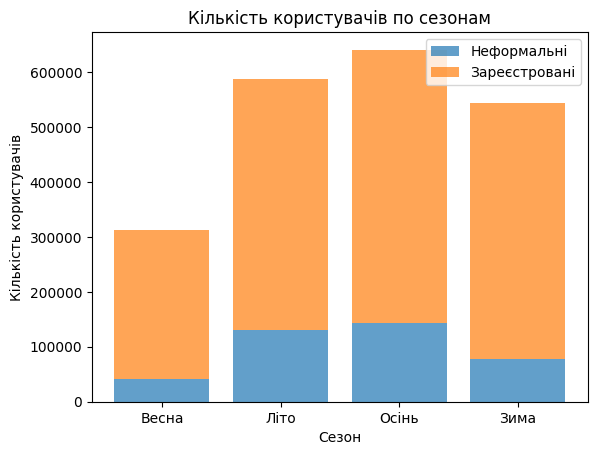

In [4]:
season_grouped = df[['season', 'casual', 'registered']]
sg = season_grouped.groupby('season').sum()

season_names = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
plt.bar(sg.index, sg['casual'], label='Неформальні', alpha=.7)
plt.bar(sg.index, sg['registered'], bottom=sg['casual'], label='Зареєстровані', alpha=.7)

plt.xticks(ticks=sg.index, labels=[season_names[i] for i in sg.index])

plt.xlabel('Сезон')
plt.ylabel('Кількість користувачів')
plt.title('Кількість користувачів по сезонам')
plt.legend()
plt.show();

In [36]:
seasonal_working_days = df.groupby(['season', 'workingday']).size().reset_index(name='count')

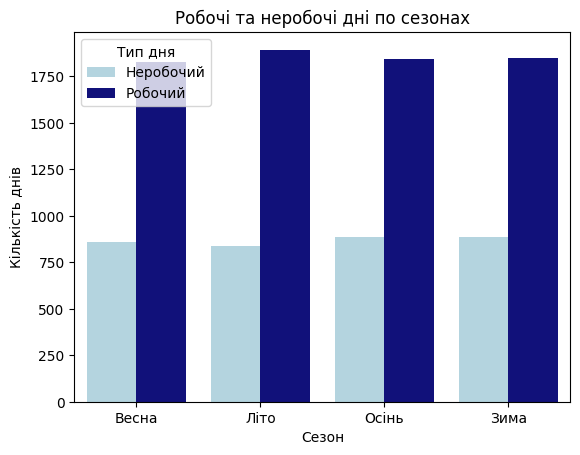

In [38]:
palette = {0: 'lightblue', 1: 'darkblue'}

sns.barplot(x='season', y='count', hue='workingday', data=seasonal_working_days, palette=palette)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Весна', 'Літо', 'Осінь', 'Зима'])
plt.xlabel('Сезон')
plt.ylabel('Кількість днів')
plt.title('Робочі та неробочі дні по сезонах')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Неробочий', 'Робочий'], title='Тип дня')
plt.show()

### 2 питання
Як залежить кількість оренд від температури, в робочий та неробочий день.

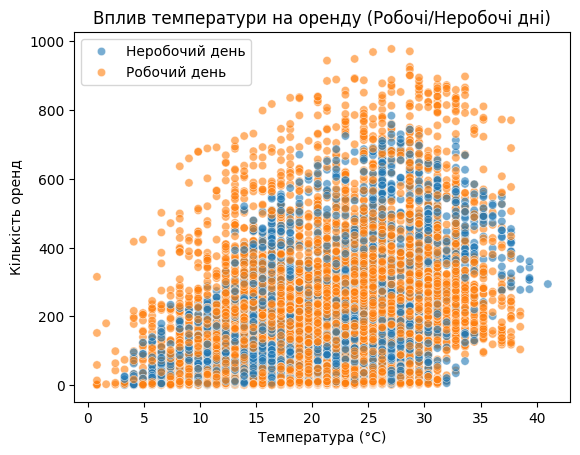

In [59]:
df['day_type'] = df['workingday'].apply(lambda x: 'Робочий день' if x == 1 else 'Hеробочий день')

sns.scatterplot(x='temp', y='count', hue='day_type', data=df, alpha=0.6)
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.title('Вплив температури на оренду (Робочі/Неробочі дні)')
plt.legend()
plt.show()

Можемо бачити, що в робочі дні і в незалежності від температури, оренди високі, а от в святкові дні температура впливає і оренд значно менше.

### 3 питання
Взаємозвязок між температурою, вологістю, швидкістю вітру на показники кількості аренд у користувачів.

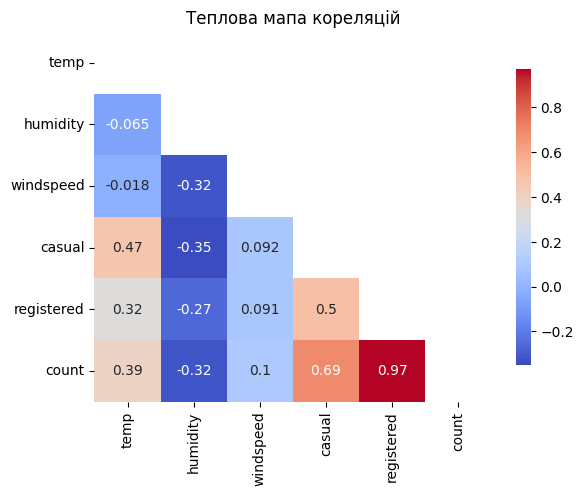

In [60]:
corr_matrix = df[['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', cbar_kws={"shrink": 0.8})
plt.title('Теплова мапа кореляцій')
plt.show()

За цим тепловим графіком чітко бачимо,що швидкість вітру немає впливу на кількість оренд, а от температура та вологість на пряму впливає.